In [24]:
import pandas as pd

In [25]:
life_ex = pd.read_csv('data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_5358385.csv', skiprows=4)
health_ex = pd.read_csv('data/API_SH.XPD.CHEX.PC.CD_DS2_en_csv_v2_5359940.csv', skiprows=4)

In [26]:
life_ex.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152,64.537,64.752,65.132,65.294,65.502,...,75.636,75.601,75.683,75.617,75.903,76.072,76.248,75.723,NaN,NaN


In [27]:
health_ex.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Only keep columns for life_ex: Country Name, 2019
life_ex = life_ex[['Country Name', '2019']]
life_ex

,Country Name,2019
0,Aruba,76.248000
1,Africa Eastern and Southern,63.755674
2,Afghanistan,63.565000
3,Africa Western and Central,57.555796
4,Angola,62.448000
...,...,...
261,Kosovo,79.022000
262,"Yemen, Rep.",65.092000
263,South Africa,66.175000
264,Zambia,62.793000


In [29]:
# Only keep columns for life_ex: Country Name, 2019
health_ex = health_ex[['Country Name', '2019']]
health_ex

,Country Name,2019
0,Aruba,NaN
1,Africa Eastern and Southern,91.078351
2,Afghanistan,65.806030
3,Africa Western and Central,61.362172
4,Angola,71.326004
...,...,...
261,Kosovo,NaN
262,"Yemen, Rep.",NaN
263,South Africa,546.688416
264,Zambia,69.324379


In [30]:
# add new column in health_ex with life expectancy
health_ex['Life Expectancy at Birth (total years)'] = life_ex['2019']
health_ex

,Country Name,2019,Life Expectancy at Birth (total years)
0,Aruba,NaN,76.248000
1,Africa Eastern and Southern,91.078351,63.755674
2,Afghanistan,65.806030,63.565000
3,Africa Western and Central,61.362172,57.555796
4,Angola,71.326004,62.448000
...,...,...,...
261,Kosovo,NaN,79.022000
262,"Yemen, Rep.",NaN,65.092000
263,South Africa,546.688416,66.175000
264,Zambia,69.324379,62.793000


In [31]:
# rename 2019 column to Health Expenditure per Capita (current US$)
health_ex.rename(columns={'2019': 'Health Expenditure per Capita (current US$)'}, inplace=True)
health_ex

,Country Name,Health Expenditure per Capita (current US$),Life Expectancy at Birth (total years)
0,Aruba,NaN,76.248000
1,Africa Eastern and Southern,91.078351,63.755674
2,Afghanistan,65.806030,63.565000
3,Africa Western and Central,61.362172,57.555796
4,Angola,71.326004,62.448000
...,...,...,...
261,Kosovo,NaN,79.022000
262,"Yemen, Rep.",NaN,65.092000
263,South Africa,546.688416,66.175000
264,Zambia,69.324379,62.793000


In [32]:
# Drop nans
health_ex.dropna(inplace=True)



# sort by Health Expenditure per Capita (current US$)
health_ex.sort_values(by='Health Expenditure per Capita (current US$)', ascending = False, inplace=True)

# reset index
health_ex.reset_index(drop=True, inplace=True)

health_ex

,Country Name,Health Expenditure per Capita (current US$),Life Expectancy at Birth (total years)
0,United States,10921.012695,78.787805
1,North America,10317.570019,79.123365
2,Switzerland,9666.337891,83.904878
3,Norway,8007.397949,82.958537
4,Iceland,6274.959473,83.163415
...,...,...,...
221,Eritrea,25.267935,67.300000
222,South Sudan,22.638187,55.912000
223,"Congo, Dem. Rep.",20.570732,60.276000
224,Burundi,20.567541,62.351000


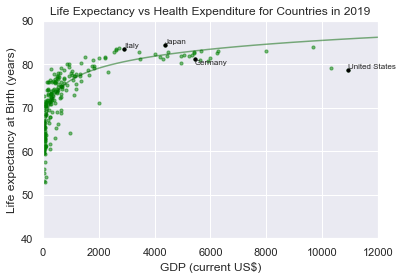

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.linear_model import LinearRegression
sns.set_theme()


# conditional plot for the year 2020
df_2020 = health_ex
plt.scatter(data=df_2020, x='Health Expenditure per Capita (current US$)', y='Life Expectancy at Birth (total years)', c='green', marker='o', s=10, alpha=0.5, label='2019')
# fit a linear model between log GDP and life expectancy
reg = LinearRegression().fit(np.log(df_2020['Health Expenditure per Capita (current US$)']).values.reshape(-1, 1), df_2020['Life Expectancy at Birth (total years)'].values.reshape(-1, 1))
# plot the linear model
x = np.linspace(start=4, stop=12, num=100)
y = reg.coef_[0][0] * x + reg.intercept_[0]
plt.plot(np.exp(x), y, alpha=0.5, c='darkgreen')

# annotate Japan with country name, make point bigger

for row in df_2020.index:
    if df_2020.loc[row, 'Country Name'] in ['Japan', 'Germany', 'Italy', 'United States']:
        plt.scatter(data=df_2020.loc[row, :], x='Health Expenditure per Capita (current US$)', y='Life Expectancy at Birth (total years)', c='black', marker='o', s=10, alpha=1)
        plt.text(x=df_2020.loc[row, 'Health Expenditure per Capita (current US$)'] + 0.2, y=df_2020.loc[row, 'Life Expectancy at Birth (total years)'] + 0.3 - 1.6*(df_2020.loc[row, 'Country Name'] == 'Germany'), s=df_2020.loc[row, 'Country Name'], fontsize=8)

    




# plt.legend(title='Year')  
plt.title('Life Expectancy vs Health Expenditure for Countries in 2019')
# plt.xscale('log')
# make y axis go from 0 to 100
plt.ylim(40, 90)
plt.xlim(0, 12000)
plt.xlabel('GDP (current US$)')
plt.ylabel('Life expectancy at Birth (years)')
plt.show()